# Gradient Descent and Maximum Likelihood

## Question 1.1 (5 points)

Let's implement a test function for the gradient descent optimizer, a 3D simple parabola. All gradient-optimized trainers are implemented as a objective function. The follow the same basic pattern:

```ruby
class MyGradientLearnableModel
  def func x, w
    #Returns the value of the objective function, 
    #  summing across all examples in x
  end
  def grad x, w
    #Returns a hash of derivative values for each variable in w,
    # gradient is summed across all examples in x
    dw = {"0" => (w["0"] - 1), "1" => (w["1"] - 2)}
  end
  def adjust w
    # Applies any problem-specific alterations to w
  end
end
```

Now, let's implement a Parabola objective function which does not depend on the data at all. It is defined as follows:

### $L(w) = \frac{1}{2}\left( \left(w_{0} - 1\right)^2 + \left(w_{1} - 2\right)^2 \right)$

Implement the ```func``` method for the loss function, $L(w)$. 

**Note**: The data, i.e., ```x``` is not actually used in this objective function. Other objective functions may use ```x```. 

In [1]:
from lib.basic import *
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class ParabolaObjective:
    def func(self, x, w):
        return ((w["0"] - 1) ** 2 + (w["1"] - 2) ** 2) / 2

    def adjust(self, w):
        pass

In [3]:
### TESTS ###
t1 = ParabolaObjective()
assert_in_delta(0.0, t1.func([], {"0": 1.0, "1": 2.0}), 1e-3)
assert_in_delta(0.5, t1.func([], {"0": 1.0, "1": 1.0}), 1e-3)
assert_in_delta(0.5, t1.func([], {"0": 1.0, "1": 3.0}), 1e-3)
assert_in_delta(2.5, t1.func([], {"0": 3.0, "1": 1.0}), 1e-3)

## Question 1.2 (5 Points)

Implement the gradient function for $L(w)$. It evaluates the gradient for the value of $x$ for each dimension of $w$. In this simple case, $L(w)$ does not depend on $x$.

In [4]:
def grad(self, x, w):
        return {"0": w["0"] - 1, "1": w["1"] - 2}

# class ParabolaObjective:
#     def grad(self, x, w):
ParabolaObjective.grad = grad

In [5]:
### TESTS ###
t2 = ParabolaObjective()
w2_1 = t2.grad([], {"0": 3.0, "1": 7.0})
assert_in_delta(2.0, w2_1["0"], 1e-3)
assert_in_delta(5.0, w2_1["1"], 1e-3)

w2_2 = t2.grad([], {"0": -3.0, "1": -7.0})
assert_in_delta(-4.0, w2_2["0"], 1e-3)
assert_in_delta(-9.0, w2_2["1"], 1e-3)

## Question 2.1 (1 Point)


Implement gradient descent for any objective function class. Your function must provide a callback which we will use to monitor its performance and possibly to halt execution. A simple example illustrating the callback is as follows:

```ruby
def gradient_descent_example dataset, w, obj, learning_rate, tol, max_iter, &block
    iter = 1
    until converged(last_loss, current_loss) do
        w_last = w
        loss = calc_loss(w)
        w = update(w)
        w = adjust(w)
        iter += 1
        break unless yield w, iter, loss
    end
    
    return w
end

```

There are three main parts to the algorithm above:
1. Convergence is based on the absolute difference between the loss of the current and previoud iteration.
1. The norm can be calculated as the dot product of two vectors: $||w|| = w \cdot w$
1. Once the loss and gradient functions are calculated, we will update the values of each weight

### Implement dot product
In this first part, implement the dot product. The dot product below should be for sparse vectors. Use ```has_key?``` to skip entries in vector ```w``` not present in ```x```.

In [6]:
### TEST ###
assert_in_delta(6.0, dot({"a": 2.0}, {"a": 3.0}), 1e-6)
assert_in_delta(6.0, dot({"a": 2.0}, {"a": 3.0, "b": 4.0}), 1e-6)
assert_equal(0.0, dot({}, {}))
assert_equal(0.0, dot({"a": 1.0}, {"b": 1.0}))

## Question 2.2 (1 Point)
Implement the L2 norm for a vector, i.e., $\left \lVert x \right \rVert$, when represented by a hash. Hint: use ```dot``` and don't forget the square root.

In [7]:
### TEST ###
assert_in_delta(2.0, norm({"a": 1.41421, "b": 1.41421}), 1e-2)
assert_in_delta(2.0, norm({"a": -1.41421, "b": 1.41421}), 1e-2)
assert_in_delta(0.0, norm({}), 1e-2)

## Question 2.3 (3 points)
Implement a function that updates a weight vector, ```w```, given a gradient vector, ```dw```, and learning rate, ```lr```.  Do not change the original weight vector. Hint: use ```clone```.

In [8]:
def update_weights(w, dw, lr):
    wc = w.copy()
    for key in wc:
        wc[key] -= lr * dw[key]
    return wc

In [9]:
### TEST ###
assert_in_delta(1.5, update_weights({"a": 1.0}, {"a": -0.25}, 2.0)["a"], 1e-2)
assert_in_delta(2.5, update_weights({"a": 1.0, "b": 3.0}, {"a": -0.25, "b": 0.25}, 2.0)["b"], 1e-2)

## Question 2.4 (15 Points)

Now, put all these functions together to implement gradient descent. This function takes the ```dataset``` and calls the function and gradient on all the examples. Hint: Increment ```iter``` before calling ```yield```.

In [10]:
def gradient_descent(dataset, w, obj, learning_rate, tol, max_iter, call_back):
    i = 0
    examples = dataset["data"]
    loss = obj.func(examples, w)
    while i < max_iter:
        w = update_weights(w, obj.grad(examples, w), learning_rate)
        obj.adjust(w)
        last_loss = loss
        loss = obj.func(examples, w)
        i += 1
        call_back(w, i, loss)
        if abs(last_loss - loss) < tol:
            break
    return w

In [11]:
### TESTS ###

t4 = ParabolaObjective()
t4_w_init = {"0": 3.0, "1": 7.0}
t4_w_goal = {"0": 1.0, "1": 2.0}
t4_dataset = {"data": []}

t4_loss = 1.0
t4_w = None

def update_loss_w(w, i, loss):
    global t4_loss
    global t4_w
    t4_loss = loss
    t4_w = w

gradient_descent(t4_dataset, t4_w_init, t4, 0.1, 0.001, 100, update_loss_w)


assert_in_delta(0.01, t4_loss, 1e-2)
assert_in_delta(t4_w_goal["0"], t4_w["0"], 1e-1)
assert_in_delta(t4_w_goal["1"], t4_w["1"], 1e-1)

In [12]:
### TEST ###
t4 = ParabolaObjective()
t4_w_init = {"0": 3.0, "1": 7.0}
t4_data = {"data": []}

t4_total_loss = 0.0
t4_iterations = []
t4_losses = []

def call_back(w, i, loss):
    global t4_total_loss
    global t4_iterations
    global t4_losses
    t4_total_loss += loss
    t4_iterations.append(i)
    assert(i > 0) # "Make sure to increment 'iter' before calling 'yield'")
    t4_losses.append(t4_total_loss / i)

gradient_descent(t4_data, t4_w_init, t4, 0.1, 0.001, 100, call_back)

assert(len(t4_iterations) > 30)
assert(t4_losses[-1] < 3)
assert(t4_losses[-1] > 0)
assert(t4_iterations[-1] > 30)

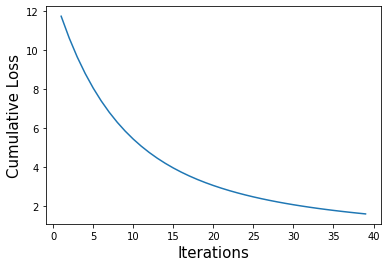

In [13]:
fig, ax = plt.subplots()
ax.plot(t4_iterations, t4_losses)
ax.set_xlabel('Iterations', fontsize=15)
ax.set_ylabel('Cumulative Loss', fontsize=15)
plt.show()

## Question 3.1 (5 Points)

Let's learn the parameter of a Bernoulli distribution using the method of maximum likelihood. Consider the following dataset in which we are tossing a biased coin with probability $\mu$ of returning a success (1). There is an analytical solution to find this parameter $\mu$ given a dataset of successes and trials. Compute this analytical solution. 

Here the ```label``` field is either 0 or 1. 

### Dataset format
This is the format for the coin dataset. The format below will be used throughout most of the assignments. A dataset contains some extra details like the classes and names of features. The ```data``` entry is an array of examples containing ```features``` and a label. Notice that in this particular dataset, there aren't any "features", just a ```bias``` value.

In [14]:
def coin_dataset(n=10000):
    p = 0.7743
    dataset = []
    rand = random.Random()
    rand.seed(777) # seed random number generator
    for _ in range(n):
        outcome = 1.0 if rand.random() < p else 0.0
        dataset.append({"features": {"bias": 1.0}, "label": outcome})
    return {"classes": {}, "features": ["bias"], "data": dataset}

In [15]:
import json
print(json.dumps(coin_dataset(1), indent=4))

{
    "classes": {},
    "features": [
        "bias"
    ],
    "data": [
        {
            "features": {
                "bias": 1.0
            },
            "label": 1.0
        }
    ]
}


In [16]:
def q31_binomial_parameter(coin_data):
    return sum(e["label"] for e in coin_data["data"]) / len(coin_data["data"])

In [17]:
### TESTS ###

t31_coin_data = coin_dataset(10000)
assert_in_delta(0.77, q31_binomial_parameter(t31_coin_data), 5e-2)

## Question 3.2 (5 Points)

Now, let's use the maximum likelihood function and gradient descent to find the same parameter value. Define the objective function for a binomial distribution for multiple samples. Remember that the ```label``` is the target value and every example has only one feature, ```bias```. Learn the weight for the ```bias``` feature should converge to $w_{bias} = \mu$.

In this first step, calculate the log likelihood function for the binomial distribution of $n$ examples.

In [18]:
class BinomialModel:
    def func(self, examples, w):
        h = sum(e["label"] for e in examples)  # head
        t = len(examples) - h                  # tail
        return - h * math.log(w["bias"]) - t * math.log(1.0 - w["bias"])

In [19]:
### TEST ###
t32_model = BinomialModel()
t32_t1 = {"features": {"bias": 1.0}, "label": 0.0}
t32_t2 = {"features": {"bias": 1.0}, "label": 1.0}
t32_dataset = {
  "data": [t32_t1, t32_t2]
}

assert_in_delta(1.469677, t32_model.func([t32_t1], {"bias": 0.77}), 1e-3)
assert_in_delta(0.261365, t32_model.func([t32_t2], {"bias": 0.77}), 1e-3)
assert_in_delta(1.731041, t32_model.func(t32_dataset["data"], {"bias": 0.77}), 1e-3)

## Question 3.3 (5 Points)

Calculate the gradient of the binomial log likelihood function over $n$ examples.

In [20]:
def grad(self, examples, w):
    # BEGIN YOUR CODE
    h = sum(e["label"] for e in examples)
    t = len(examples) - h
    g = {"bias": - (h / w["bias"]) + t / (1.0 - w["bias"])}
    # END YOUR CODE
    return g
  
## Adjusts the parameter to be within the allowable range
def adjust(self, w):
    w["bias"] = min(max(0.001, w["bias"]), 0.999)

BinomialModel.grad = grad
BinomialModel.adjust = adjust

In [21]:
### TEST ###
t33_model = BinomialModel()
t33_t1 = {"features": {"bias": 1.0}, "label": 0.0}
t33_t2 = {"features": {"bias": 1.0}, "label": 1.0}

t33_dataset = {"data": [t33_t1, t33_t2]}

assert_in_delta(4.347826, t32_model.grad([t33_t1], {"bias": 0.77})["bias"], 1e-3)
assert_in_delta(-1.29870, t32_model.grad([t33_t2], {"bias": 0.77})["bias"], 1e-3)
assert_in_delta(3.049124, t32_model.grad(t33_dataset["data"], {"bias": 0.77})["bias"], 1e-3)

## Question 3.4 (5 Points)

Putting the objective function to work, use gradient descent to find the parameter for the binomial distribution. You get to set the learning rate. Return the learning rate you have obtained which works well. You may have to try a few until you get it right.

Note that, while capable of returning the same value, this method reads the data many more times than the analytical solution.

In [22]:
def q34_learning_rate():
    # BEGIN YOUR CODE
    return 0.000001
    # END YOUR CODE

1	{'bias': 0.32585206065692723}	9572.265244497607
11	{'bias': 0.48225122911857}	8148.965694777912
21	{'bias': 0.5806967643618449}	7383.942570414282
31	{'bias': 0.6485706786389037}	6902.477709888809
41	{'bias': 0.6952647330499797}	6579.920631005548
51	{'bias': 0.7262952088008638}	6355.8051620051765
61	{'bias': 0.7460015513307106}	6195.239080009977
71	{'bias': 0.7579905337412772}	6076.59853314645
81	{'bias': 0.7650428224694106}	5986.213808546413
91	{'bias': 0.7690958137864268}	5915.381175116339


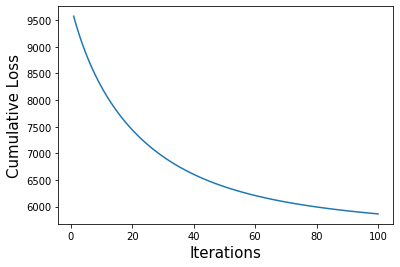

In [23]:
### TEST ###
t34 = BinomialModel()
rand = random.Random()
t34_w_init = {"bias": rand.random()}
t34_data = coin_dataset(10000)

t34_learning_rate = q34_learning_rate()

t34_total_loss = 0.0
t34_iterations = []
t34_losses = []
t34_w = t34_w_init

def call_back(w, i, loss):
    global t34_total_loss
    global t34_iterations
    global t34_losses
    global t34_w
    t34_total_loss += loss
    t34_iterations.append(i)
    assert(i > 0) # "Make sure to increment iter before calling yield")
    t34_losses.append(t34_total_loss / i)
    t34_w = w
    if i % 10 == 1:
        print("\t".join([i.__str__(), w.__str__(), t34_losses[-1].__str__()]))

gradient_descent(t34_data, t34_w_init, t34, t34_learning_rate, 0.001, 100, call_back)


assert(t34_losses[-1] < 8000)
assert(t34_losses[-1] > 0)
assert(t34_iterations[-1] > 30)
assert_in_delta(0.77, t34_w["bias"], 5e-2)

### Plot the cumulative loss per iteration
fig, ax = plt.subplots()
ax.plot(t34_iterations, t34_losses)
ax.set_xlabel('Iterations', fontsize=15)
ax.set_ylabel('Cumulative Loss', fontsize=15)
plt.show()

## Question 4.1 (10 Points)

The maximum likelihood method above reads the data multiple times and can benefit from prior knowledge in the form of a prior distribution for the parameter, $\mu$. Using the ```Beta distribution``` as the conjugate prior, implement the likelihood function and its gradient. Now we are learning three parameters altogether: $w_{bias} = \mu$, $\alpha$, $\beta$.

First, let's compute the closed form estimator for $\mu$ with a fixed $\alpha$ and $\beta$.

In [24]:
def q41_closed_form_beta_binomial(coin_data, alpha, beta):
    # BEGIN YOUR CODE
    return alpha / (alpha + beta)
    # END YOUR CODE

In [25]:
### TEST ###
t41_coin_data = coin_dataset(10000)
assert_in_delta(0.77, q41_closed_form_beta_binomial(t41_coin_data, 7743, 10000 - 7743), 1e-1)

## Question 4.2 (10 points)

Implement the negative log likelihood function for the beta + binomial values. Checkout this [Wikipedia](https://en.wikipedia.org/wiki/Beta_distribution#Maximum_likelihood) definition of the likelihood function. Remember we are interested in he negative log likelihood.

A special function is needed ```GSL::Sf::lnbeta(a, b)```.

In [26]:
import scipy.special as sc
class BetaBinomialModel:
    def func(self, examples, w):
        # BEGIN YOUR CODE
        h = sum(e["label"] for e in examples)  # head
        t = len(examples) - h                  # tail
        bin_loss = - (h * math.log(w["bias"]) + t * math.log(1 - w["bias"]))
        beta_loss = -(w['alpha'] - 1) * math.log(w["bias"]) * (h + t) \
                     - (w['beta'] - 1) * math.log(1 - w["bias"]) * (h + t)
        beta_loss += (h + t) * math.log(sc.beta(w['alpha'], w['beta']))
        return beta_loss + bin_loss
        # END YOUR CODE

    def adjust(self, w):
        w["bias"] = min(max(0.001, w["bias"]), 0.999)
        w["beta"] = max(0.0001, w["beta"])

In [27]:
### TESTS ###
t42 = BetaBinomialModel()

t42_data = coin_dataset(1000)["data"]
t42_w = {} # default 0.1
t42_w["alpha"] = 7.0
t42_w["beta"] = 3.0
t42_w["bias"] = 0.1

print(t42.func(t42_data, t42_w))
assert_in_delta(10285.237043665873, t42.func(t42_data, t42_w), 1e-2)

10285.237043665873


## Question 4.3 (10 points)

Implement the negative log likelihood gradient for all the parameters. Checkout this [Wikipedia](https://en.wikipedia.org/wiki/Beta_distribution#Maximum_likelihood) definition of the likelihood function. Remember we are interested in the negative log likelihood. The gradient for the ```bias``` requires all examples in the dataset. However, the gradient for ```alpha``` and ```beta``` does not require a pass over the dataset.

A special function is needed ```GSL::Sf::psi(a + b)```.

In [28]:
def grad(self, examples, w):
    # BEGIN YOUR CODE
    n = len(examples)
    h = sum(e["label"] for e in examples)  # head
    t = len(examples) - h                  # tail
    grad_bias = - (h / w["bias"]) + (t / (1 - w["bias"]))
    grad_alpha = (-math.log(w["bias"]) + sc.psi(w['alpha']) - sc.psi(w['alpha'] + w['beta']))
    grad_beta = -math.log(1 - w["bias"]) + sc.psi(w['beta']) - sc.psi(w['alpha'] + w['beta'])
    return {"bias": grad_bias, 'alpha': grad_alpha, 'beta': grad_beta }
    #END YOUR CODE

BetaBinomialModel.grad = grad
print(sc.psi(7.0))

1.872784335098467


In [29]:
### TESTS ###

t43 = BetaBinomialModel()
t43_data = coin_dataset(1000)["data"]
t43_w = {}
t43_w["bias"] = 0.1
t43_w["alpha"] = 7.0
t43_w["beta"] = 3.0

t43_grad = t43.grad(t43_data, t43_w)

assert_in_delta(-7400.0, t43_grad["bias"], 1e2)
assert_in_delta(1.9236168390257913, t43_grad["alpha"], 1e-1)
assert_in_delta(-1.2236077383104214, t43_grad["beta"], 1e-1)

## Question 4.4 (20 points)

Run the gradient descent by selecting the initial weights and learning rate. Try a few values. 

In [30]:
def q44_weights_and_learning_rate():
    # BEGIN YOUR CODE
    w = {"bias": 0.7, "alpha": 7.0, "beta": 3.0}
    lr = 0.000001
    #END YOUR CODE
    return [w, lr]

1	{'bias': 0.7035380952380952, 'alpha': 7.00000002229331, 'beta': 3.0000001249954495}	-4412.725437219142
11	{'bias': 0.731635370163245, 'alpha': 7.000000487370085, 'beta': 3.0000007801322908}	-4669.676377564177
21	{'bias': 0.7492954638419963, 'alpha': 7.000001269673247, 'beta': 3.0000005859272445}	-4789.059467006642
31	{'bias': 0.7599475647157031, 'alpha': 7.000002242895413, 'beta': 2.999999828287605}	-4840.528348691766
41	{'bias': 0.7661749014777313, 'alpha': 7.000003327978414, 'beta': 2.999998719424089}	-4860.514188177582
51	{'bias': 0.769739466944564, 'alpha': 7.000004477270011, 'beta': 2.999997401225344}	-4866.686676719843
61	{'bias': 0.7717531470790443, 'alpha': 7.000005662911989, 'beta': 2.999995961869592}	-4867.145451559649
71	{'bias': 0.7728818362501624, 'alpha': 7.00000686895682, 'beta': 2.9999944536432293}	-4865.454373226352
81	{'bias': 0.773511626800249, 'alpha': 7.0000080863949625, 'beta': 2.999992906681147}	-4863.12463242221
91	{'bias': 0.7738621404364479, 'alpha': 7.00000

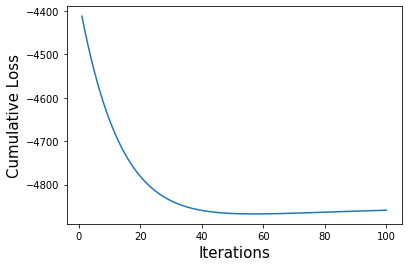

In [31]:
### TEST ###
t44 = BetaBinomialModel()
t44_data = coin_dataset(10000)

t44_w_init, t44_learning_rate = q44_weights_and_learning_rate()

t44_total_loss = 0.0
t44_iterations = []
t44_losses = []
t44_w = t34_w_init
def call_back(w, i, loss):
    global t44_total_loss
    global t44_iterations
    global t44_losses
    global t44_w
    t44_total_loss += loss
    t44_iterations.append(i)
    t44_losses.append(t44_total_loss / i)
    t44_w = w
    if i % 10 == 1:
        print("\t".join([i.__str__(), w.__str__(), t44_losses[-1].__str__()]))

gradient_descent(t44_data, t44_w_init, t44, t44_learning_rate, 0.001, 100, call_back)

print(len(t44_losses))
assert(t44_losses[-1] < 8000)
assert(t44_iterations[-1] > 30)
assert_in_delta(0.77, t44_w["bias"], 5e-2)

### Plot the cumulative loss per iteration
fig, ax = plt.subplots()
ax.plot(t44_iterations, t44_losses)
ax.set_xlabel('Iterations', fontsize=15)
ax.set_ylabel('Cumulative Loss', fontsize=15)
plt.show()